In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
data = pd.read_csv('../datasets/ads/Advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## agrego el Newspaper a la regresión:

In [3]:
lr = smf.ols(formula='Sales~TV+Newspaper', data=data).fit()

In [4]:
print("coeficientes: ", lr.params)
print("\np-values: ", lr.pvalues)

coeficientes:  Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

p-values:  Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64


## <font color='orange'>Sales = 5.774948 + 0.046901 * TV + 0.044219 * Newspaper</font>

### los R2 mejoraron con respecto a la lineal simple; el F-satistics bajó a la mitad; AIC/BIC bajaron 10. Mejoró el Durbin-Watson

In [5]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           3.95e-45
Time:                        23:28:27   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
sales_pred = lr.predict(data[['TV', 'Newspaper']])

## calculo la suma de los cuadrados de las diferencias (SSD):

In [7]:
SSD = sum((data['Sales']-sales_pred)**2)
SSD

1918.561811896827

### este multivariable apenas mejora el RSE con respecto al univariable

In [8]:
#hago data - 2 - 1 (número de variables -1: en este caso nro de variables predictoras: Tv y newspaper)
RSE = np.sqrt(SSD/len(data-2-1))
RSE

3.097226026541191

### también baja el error (antes 23.12)

In [9]:
sales_mean = np.mean(data['Sales'])
error = RSE/sales_mean
error

0.22087545206212805

### ploteo la distribución del error:

(array([ 5.,  8., 14., 22., 51., 47., 23., 18., 10.,  2.]),
 array([-8.6230898 , -6.91565958, -5.20822935, -3.50079912, -1.7933689 ,
        -0.08593867,  1.62149155,  3.32892178,  5.036352  ,  6.74378223,
         8.45121245]),
 <a list of 10 Patch objects>)

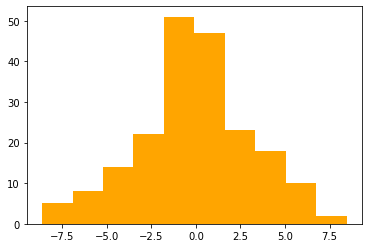

In [10]:
res = (data['Sales'] - sales_pred)
plt.hist(res, color="orange")

## <font color='red'>hago un nuevo modelo, pero con la Radio</font>

In [11]:
lr = smf.ols(formula='Sales~TV+Radio', data=data).fit()
print("coeficientes: ", lr.params)
print("\np-values: ", lr.pvalues)

coeficientes:  Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64

p-values:  Intercept    4.565557e-19
TV           5.436980e-82
Radio        9.776972e-59
dtype: float64


### los resultados mejoran notablemente al agregar la Radio (TV+Radio)

In [12]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           4.83e-98
Time:                        23:28:27   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
sales_pred = lr.predict(data[['TV', 'Radio']])
SSD = sum((data['Sales']-sales_pred)**2)
SSD

556.9139800676186

In [14]:
RSE=np.sqrt(SSD/len(data-2-1))
RSE

1.6687030593661931

In [15]:
sales_mean = np.mean(data['Sales'])
error = RSE/sales_mean
error*100

11.900182273961082

## conclusión

* el statsmodels mejora mucho al considerar TV+Radio (todos los estadísticos)
* el RSE baja a la mitad
* el modelo no podía explicar el 23% de las predicciones, ahora no puede explicar el 11%

# colocamos todas las variables en el modelo:

In [16]:
lr = smf.ols(formula='Sales~TV+Radio+Newspaper', data=data).fit()
print("coeficientes: ", lr.params)
print("\np-values: ", lr.pvalues)

coeficientes:  Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

p-values:  Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64


## conclusión: agregar a newspaper (tv+sales+newspaper) perjudica nuestro modelo

* el coeficiente es negativo (¿hay que invertir menos en newspaper para ganar más?)
* los R se mantienen igual
* el F-statistic cae 300 puntos
* la P(F-statistic) baja
* el p-value de newspaper extremadamente alto (casi 1)
* el intervalo de confianza de newspaper toca el 0

In [17]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 20 Sep 2020   Prob (F-statistic):           1.58e-96
Time:                        23:28:27   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""